## Preparación de datos

### Importaciones

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

### Carga del dataset

Leer en un dataframe de pandas el dataset contenido en el fichero **Automobile_price.csv** y Muestra las primeras 10 líneas.
#### Función `read_csv()`

La función `read_csv()` de pandas se utiliza para leer un archivo CSV y cargarlo en un DataFrame. Permite especificar varios parámetros, como el delimitador, la codificación y si hay encabezados en el archivo.

```python
df = pd.read_csv('nombre_del_archivo.csv')
```

#### Función `head()`

El método `head()` se utiliza para mostrar las primeras filas de un DataFrame. Por defecto, devuelve las primeras 5 filas, pero puedes especificar un número diferente como argumento.

```python
df.head(n)  # donde n es el número de filas que deseas mostrar
```
```

In [29]:
# Leer el archivo CSV
df = pd.read_csv('02.1.auto_prices.csv')

# Mostrar las primeras 10 lineas
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,12495€
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,15278€
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,9450,...,152,mpfi,2.68,3.47,900,154,5000,19,26,15278€
3,2,164,audi,gas,std,four,sedan,fwd,front,9980,...,109,mpfi,3.19,3.40,1000,102,5500,24,30,12917€
4,2,164,audi,gas,std,four,sedan,4wd,front,9940,...,136,mpfi,3.19,3.40,800,115,5500,18,22,16157€
5,2,?,audi,gas,std,two,sedan,fwd,front,9980,...,136,mpfi,3.19,3.40,850,110,5500,19,25,14120€
6,1,158,audi,gas,std,four,sedan,fwd,front,10580,...,136,mpfi,3.19,3.40,850,110,5500,19,25,16398€
7,1,?,audi,gas,std,four,wagon,fwd,front,10580,...,136,mpfi,3.19,3.40,850,110,5500,19,25,17519€
8,1,158,audi,gas,turbo,four,sedan,fwd,front,10580,...,131,mpfi,3.13,3.40,830,140,5500,17,20,22106€
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,9950,...,131,mpfi,3.13,3.40,700,160,5500,16,22,?


### Eliminación de las filas duplicadas

Mostrar las dimensiones del dataset antes y después de eliminar las filas repetidas:

#### Propiedad `shape`

La propiedad `shape` de un DataFrame en pandas se utiliza para obtener las dimensiones del DataFrame. Devuelve una tupla que contiene dos elementos:

- El primer elemento es el número de filas.
- El segundo elemento es el número de columnas.


Esto es útil para entender la estructura del dataset y verificar cuántos registros y características contiene.

---

#### Método `drop_duplicates()`

El método `drop_duplicates()` se utiliza para eliminar filas duplicadas de un DataFrame. Devuelve un nuevo DataFrame sin duplicados. Puedes especificar si deseas mantener la primera o la última ocurrencia de los duplicados y también puedes eliminar duplicados basados en columnas específicas.



#### Parámetros importantes:

- `keep`: Determina qué duplicados mantener. Puede ser `'first'` (predeterminado), `'last'` o `False` (eliminar todos los duplicados).
- `subset`: Permite especificar una lista de columnas para considerar al identificar duplicados.

Esto es útil para limpiar el dataset y asegurarte de que cada fila sea única.

In [30]:
print('Dimensiones del dataset con duplicados: ' + str(df.shape))
df = df.drop_duplicates()
print('Dimensiones del dataset sin duplicados: '+ str(df.shape))

Dimensiones del dataset con duplicados: (228, 26)
Dimensiones del dataset sin duplicados: (205, 26)


### Información del dataset
Mostrar la información del dataset ofrecida por las instrucciones *describe* e *info*.

#### Método `describe()`

El método `describe()` en pandas se utiliza para generar estadísticas descriptivas de las columnas numéricas de un DataFrame. Proporciona un resumen que incluye:

- **count**: Número de valores no nulos.
- **mean**: Promedio de los valores.
- **std**: Desviación estándar, que mide la dispersión de los valores.
- **min**: Valor mínimo.
- **25%**: Primer cuartil (25% de los datos son menores que este valor).
- **50%**: Mediana (50% de los datos son menores que este valor).
- **75%**: Tercer cuartil (75% de los datos son menores que este valor).
- **max**: Valor máximo.

Este método es útil para obtener una visión general de la distribución y características de los datos numéricos en el DataFrame.

---

#### Método `info()`

El método `info()` se utiliza para obtener un resumen conciso del DataFrame. Proporciona información sobre:

- **Número de entradas**: Total de filas en el DataFrame.
- **Número de columnas**: Total de columnas en el DataFrame.
- **Nombres de las columnas**: Lista de nombres de las columnas.
- **Tipos de datos**: Tipo de datos de cada columna (por ejemplo, `int64`, `float64`, `object`).
- **Cantidad de valores no nulos**: Número de valores no nulos en cada columna.

Este método es útil para entender la estructura del DataFrame y verificar la calidad de los datos.

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          205 non-null    int64 
 1   normalized-losses  205 non-null    object
 2   make               205 non-null    object
 3   fuel-type          205 non-null    object
 4   aspiration         205 non-null    object
 5   num-of-doors       205 non-null    object
 6   body-style         205 non-null    object
 7   drive-wheels       205 non-null    object
 8   engine-location    205 non-null    object
 9   wheel-base         205 non-null    int64 
 10  length             205 non-null    int64 
 11  width              205 non-null    int64 
 12  height             205 non-null    int64 
 13  curb-weight        205 non-null    int64 
 14  engine-type        205 non-null    object
 15  num-of-cylinders   205 non-null    object
 16  engine-size        205 non-null    int64 
 17  fu

In [32]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,9830.746341,17404.926829,6590.780488,5372.487805,2555.565854,126.907317,1014.253659,25.219512,30.751220
std,1.245307,909.992337,1233.728853,214.520385,244.352197,520.680204,41.642693,397.204032,6.542142,6.886443
min,-2.000000,93.000000,14110.000000,6030.000000,4780.000000,1488.000000,61.000000,700.000000,13.000000,16.000000
25%,0.000000,9450.000000,16630.000000,6410.000000,5200.000000,2145.000000,97.000000,860.000000,19.000000,25.000000
50%,1.000000,9700.000000,17320.000000,6550.000000,5410.000000,2414.000000,120.000000,900.000000,24.000000,30.000000
75%,2.000000,10240.000000,18310.000000,6690.000000,5550.000000,2935.000000,141.000000,940.000000,30.000000,34.000000
max,3.000000,12090.000000,20810.000000,7230.000000,5980.000000,4066.000000,326.000000,2300.000000,49.000000,54.000000


### Modificación de nombres de columnas

Se deben eliminar o sustituir los caracteres en los nombres de las columnas que puedan generar errores en Python. Por ejemplo '`-`' , '`,`' , '`*`' , '`/`' , '`|`' , '`>`' , '`<`' , '`@`' , '`!`' etc.

Recorrer los nombres de las columnas reemplazándo el carácter '`-`' por '`_`':

#### Método `str.replace()`

El método `str.replace()` en pandas se utiliza para reemplazar ocurrencias de un substring en una serie de cadenas. Este método es especialmente útil para modificar los nombres de las columnas o los valores de las celdas en un DataFrame.

#### Parámetros:

- **pat**: El patrón o substring que deseas reemplazar. Puede ser una cadena de texto o una expresión regular.
- **repl**: La cadena de texto que reemplazará al patrón especificado.
- **n**: (opcional) Número de ocurrencias a reemplazar. Si no se especifica, se reemplazarán todas las ocurrencias.
- **regex**: (opcional) Si se establece en `True`, el patrón se interpretará como una expresión regular.

#### Uso:

Este método devuelve una nueva serie con las ocurrencias del patrón reemplazadas por la cadena especificada. Es útil para limpiar datos, como eliminar caracteres no deseados o estandarizar nombres.

Por ejemplo, al usar `df.columns.str.replace('-', '_')`, se reemplazan todos los guiones `-` en los nombres de las columnas por guiones bajos `_`, facilitando el acceso a las columnas en el DataFrame.

In [33]:
df.columns = df.columns.str.replace('-','_')
print(df.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


### Valores ausentes (*missing values*)

En este dataset, los valores ausentes están representados por un signo de interrogación (?). Se deben reemplazar por `np.nan`.

In [34]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,12495€
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,15278€
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,9450,...,152,mpfi,2.68,3.47,900,154,5000,19,26,15278€
3,2,164,audi,gas,std,four,sedan,fwd,front,9980,...,109,mpfi,3.19,3.40,1000,102,5500,24,30,12917€
4,2,164,audi,gas,std,four,sedan,4wd,front,9940,...,136,mpfi,3.19,3.40,800,115,5500,18,22,16157€
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,10910,...,141,mpfi,3.78,3.15,950,114,5400,23,28,15597€
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,10910,...,141,mpfi,3.78,3.15,870,160,5300,19,25,19045$
202,-1,95,volvo,gas,std,four,sedan,rwd,front,10910,...,173,mpfi,3.58,2.87,880,134,5500,18,23,21485$
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,10910,...,145,idi,3.01,3.40,2300,106,4800,26,27,22470$


In [35]:
df=df.replace('?',np.nan)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,12495€
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,15278€
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,9450,...,152,mpfi,2.68,3.47,900,154,5000,19,26,15278€
3,2,164,audi,gas,std,four,sedan,fwd,front,9980,...,109,mpfi,3.19,3.40,1000,102,5500,24,30,12917€
4,2,164,audi,gas,std,four,sedan,4wd,front,9940,...,136,mpfi,3.19,3.40,800,115,5500,18,22,16157€
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,10910,...,141,mpfi,3.78,3.15,950,114,5400,23,28,15597€
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,10910,...,141,mpfi,3.78,3.15,870,160,5300,19,25,19045$
202,-1,95,volvo,gas,std,four,sedan,rwd,front,10910,...,173,mpfi,3.58,2.87,880,134,5500,18,23,21485$
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,10910,...,145,idi,3.01,3.40,2300,106,4800,26,27,22470$


Mostrar cuantos valores ausentes (np.nan) hay en cada columna.

#### Opción 1: Usar `apply()`

El método `apply()` en pandas se utiliza para aplicar una función a lo largo de un eje del DataFrame (filas o columnas). En el contexto de contar valores ausentes, puedes usar `apply()` para aplicar una función que cuente los valores NaN en cada columna.

#### Ejemplo de uso:

```python
valores_ausentes = df.apply(lambda x: x.isna().sum())
```

- **`lambda x: x.isna().sum()`**: Esta es una función anónima que toma una columna (representada por `x`) y cuenta cuántos valores son NaN utilizando `isna()` y `sum()`.
- **Resultado**: `apply()` devuelve una serie con el número de valores ausentes para cada columna del DataFrame.

Este método es eficiente y permite realizar operaciones en todo el DataFrame sin necesidad de un bucle explícito.

---

### Opción 2: Usar `pd.Series` con `isna()`

Otra forma de contar los valores ausentes en un DataFrame es utilizando la función `isna()` de pandas y luego convirtiendo el resultado en una serie. Este enfoque permite obtener un conteo directo de los valores NaN en cada columna.

#### Ejemplo de uso:

```python
valores_ausentes = pd.Series(df.isna().sum())
```

- **`df.isna()`**: Este método genera un DataFrame booleano donde cada valor es `True` si es NaN y `False` en caso contrario.
- **`sum()`**: Al aplicar `sum()` a este DataFrame booleano, se cuentan los valores `True` en cada columna, lo que equivale a contar los valores ausentes.
- **`pd.Series(...)`**: El resultado se convierte en una serie, que muestra el número de valores ausentes por columna.

Este método es directo y aprovecha las capacidades de pandas para trabajar con datos de manera eficiente.

Opcion apply()

In [36]:
valores_avalores_ausentes = df.apply(lambda x: x.isna().sum())
print(valores_avalores_ausentes)

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


Opcion pd.Series

In [37]:
valores_ausentes = pd.Series(df.isna().sum())
print(valores_ausentes)

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


Se debe eliminar la  columna normalize_losses ya que tiene muchos valores ausentes.

In [38]:
df=df.drop(df.columns[1],axis=1)
df.shape


(205, 25)


Eliminar las filas que contengan `np.nan` y mostrar las dimensiones del dataset.

In [39]:
df.dropna(axis=0,inplace=True)
df.shape

(193, 25)

Mostrar los tipos de todas las columnas.

La columna *price* contiene valores en dólares y en euros. Unificar el precio en dólares omitiendo el símbolo $.

Mostrar las primeras filas para verificar el cambio.

#### Explicación del Código

1. **`tipo_cambio = 1.08`**:
   - Se define una variable llamada `tipo_cambio` que representa el tipo de cambio de euros a dólares. En este caso, se establece que 1 euro equivale a 1.08 dólares.

2. **`def convertir_precio(precio):`**:
   - Se define una función llamada `convertir_precio` que toma un argumento `precio`. Esta función se encargará de convertir los precios de euros a dólares.

3. **`if '€' in precio:`**:
   - Esta línea verifica si el símbolo de euro (`'€'`) está presente en el string `precio`. Si es así, se procede a convertir el precio de euros a dólares.

4. **`return float(precio.replace('€', '').strip()) * tipo_cambio`**:
   - Si el precio está en euros, se elimina el símbolo de euro y se convierte el string a un número flotante. Luego, se multiplica por el `tipo_cambio` para obtener el precio en dólares.

5. **`elif '$' in precio:`**:
   - Esta línea verifica si el símbolo de dólar (`'$'`) está presente en el string `precio`. Si es así, se procede a convertir el precio a un número flotante sin cambios adicionales.

6. **`df['price'] = df['price'].apply(convertir_precio)`**:
   - Se aplica la función `convertir_precio` a cada elemento de la columna `'price'` del DataFrame `df`. El resultado de la conversión se almacena nuevamente en la columna `'price'`.

7. **`print(df['price'].head(12))`**:
   - Esta línea imprime las primeras 12 filas de la columna `'price'` del DataFrame, mostrando los precios convertidos.

8. **`df.dtypes`**:
   - Este atributo devuelve los tipos de datos de cada columna en el DataFrame `df`, permitiendo verificar que la columna `'price'` ahora contiene valores numéricos después de la conversión.


In [123]:
print("Antes de la modificación:")
print(df['price'].head(12))
df.dtypes

Antes de la modificación:
0     13494.60
1     16500.24
2     16500.24
3     13950.36
4     17449.56
5     15249.60
6     17709.84
7     18920.52
8     23874.48
10    16430.00
11    16925.00
12    20970.00
Name: price, dtype: float64


symboling                    int64
make                        object
fuel_type                   object
aspiration                  object
num_of_doors                object
body_style                  object
drive_wheels                object
engine_location             object
wheel_base                   int64
length                       int64
width                        int64
height                       int64
curb_weight                  int64
engine_type                 object
num_of_cylinders            object
engine_size                  int64
fuel_system                 object
bore                       float64
stroke                     float64
compression_ratio            int64
horsepower                 float64
peak_rpm                   float64
city_mpg                     int64
highway_mpg                  int64
price                      float64
gruped_num_of_cylinders     object
grouped_bodystyle           object
dtype: object

In [41]:
# Definir el tipo de cambio
tipo_cambio = 1.08  # 1 euro = 1.1 dólares
 
# Función para convertir precios
def convertir_precio(precio):
    if '€' in precio:
        return float(precio.replace('€', '').strip()) * tipo_cambio
    elif '$' in precio:
        return float(precio.replace('$', '').strip())

# Aplicar la conversión a la columna 'price'
df['price'] = df['price'].apply(convertir_precio)
print(df['price'].head(12))
df.dtypes


0     13494.60
1     16500.24
2     16500.24
3     13950.36
4     17449.56
5     15249.60
6     17709.84
7     18920.52
8     23874.48
10    16430.00
11    16925.00
12    20970.00
Name: price, dtype: float64


symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base             int64
length                 int64
width                  int64
height                 int64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio      int64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

### Transformación del tipo de dato de las columnas

Las columnas *bore*, *stroke*, *horsepower* y *peak_rpm* se cargaron como tipo `object` en lugar de numéricas porque contenían el símbolo `?`.

Convertir dichas columnas a tipo numérico y mostrar los nuevos tipos.

In [42]:
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak_rpm'] = df['peak_rpm'].astype(float)
print(df.dtypes)

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base             int64
length                 int64
width                  int64
height                 int64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio      int64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object


### *Feature engineering* y transformación de variables

#### Agregación de variables categóricas

Calcular y mostrar la tabla de frecuencias de la columna `num_of_cylinders`. Interpreta el resultado.

#### Explicación del Código

1. **`pd.Series(df['num_of_cylinders'].value_counts())`**:
   - Este método cuenta la frecuencia de cada valor único en la columna `'num_of_cylinders'` del DataFrame `df`. Devuelve una serie donde los índices son los valores únicos de la columna y los valores son las cantidades de ocurrencias de cada uno. El resultado se almacena en la variable `cil_ctr`.

2. **`print(cil_ctr)`**:
   - Esta línea imprime el contenido de la variable `cil_ctr`, mostrando la frecuencia de cada tipo de cilindro en la consola.


In [43]:
cil_ctr=pd.Series(df['num_of_cylinders'].value_counts())
print(cil_ctr)

num_of_cylinders
four      153
six        24
five       10
eight       4
three       1
twelve      1
Name: count, dtype: int64


Las categorías con muy pocas instancias (`three`, `five`, `eight` y `twelve`), son estadísticamente muy poco relevantes, por lo que se agregarán en un número menor de categorías: `three_four`, `five_six` y `eight_twelve`.

Mostrar las nuevas categorías y sus frecuencias.

#### Explicación del Código

1. **`df['num_of_cylinders'].replace({...})`**:
   - Este método se utiliza para reemplazar valores en la columna `'num_of_cylinders'` del DataFrame `df`. En este caso, se están agrupando los valores de cilindros en categorías más amplias: `'three'` y `'four'` se reemplazan por `'three_four'`, `'five'` y `'six'` por `'five_six'`, y `'eight'` y `'twelve'` por `'eight_twelve'`. El resultado de esta operación se asigna a una nueva columna llamada `'gruped_num_of_cylinders'`.

2. **`pd.Series(df['gruped_num_of_cylinders'].value_counts())`**:
   - Este método cuenta la frecuencia de cada valor único en la columna `'gruped_num_of_cylinders'`. Devuelve una serie donde los índices son los valores únicos de la columna agrupada y los valores son las cantidades de ocurrencias de cada uno. El resultado se almacena en la variable `cil_ctr`.

3. **`print(cil_ctr)`**:
   - Esta línea imprime el contenido de la variable `cil_ctr`, mostrando la frecuencia de cada grupo de cilindros en la consola.


In [44]:
df['gruped_num_of_cylinders'] = df['num_of_cylinders'].replace({'three': 'three_four', 'four': 'three_four', 'five': 'five_six', 'six': 'five_six', 'eight': 'eight_twelve', 'twelve': 'eight_twelve'})
cil_ctr=pd.Series(df['gruped_num_of_cylinders'].value_counts())
print(cil_ctr)



gruped_num_of_cylinders
three_four      154
five_six         34
eight_twelve      5
Name: count, dtype: int64


Mostrar con diagramas de cajas (*boxplot*) la distribución de precios para cada una de las tres categorias de la columna `num_of_cylinders`.

#### Explicación del Código

**`sns.boxplot(y, x)`**:
- Esta función de Seaborn se utiliza para crear un boxplot (diagrama de caja) que visualiza la distribución de un conjunto de datos. En este caso, se está creando un boxplot para mostrar la relación entre el número de cilindros agrupados y los precios de los vehículos.

  - **`y=df['gruped_num_of_cylinders']`**: Especifica que los valores del eje y del boxplot serán el número de cilindros agrupados, que se obtienen de la columna `'gruped_num_of_cylinders'` del DataFrame `df`.
  
  - **`x=df['price']`**: Especifica que los valores del eje x del boxplot serán los precios de los vehículos, que se obtienen de la columna `'price'` del DataFrame `df`.

<Axes: xlabel='price', ylabel='gruped_num_of_cylinders'>

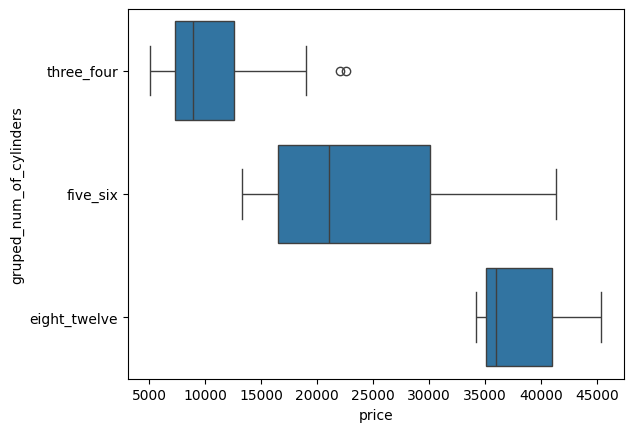

In [45]:
sns.boxplot(y=df['gruped_num_of_cylinders'],x=df['price'])

Calcular la frecuencia de cada categoría de la columna 'body_style'.

#### Explicación del Código

1. **`df['body_style'].value_counts()`**:
   - Este método cuenta la frecuencia de cada valor único en la columna `'body_style'` del DataFrame `df`. Devuelve una serie donde los índices son los valores únicos de la columna y los valores son las cantidades de ocurrencias de cada uno. Esto permite identificar cuántos vehículos hay de cada tipo de carrocería.

2. **`bodystyle_ctr`**:
   - Esta línea almacena el resultado de `value_counts()` en la variable `bodystyle_ctr`, que contendrá la frecuencia de cada estilo de carrocería en el DataFrame.



In [46]:
bodystyle_ctr= df['body_style'].value_counts()
bodystyle_ctr

body_style
sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: count, dtype: int64

Dos de las categorías tienen un número bajo de ocurrencias. Estas categorías  se pueden agregar de forma similar a cómo se hizo con la columna '`num_of_cylinders`'.

Los valores '`hardtop`' y '`convertible`' se agruparán en '`hardtop_convert`.

### Explicación del Código

1. **`df['body_style'].replace({...})`**:
   - Este método se utiliza para reemplazar valores en la columna `'body_style'` del DataFrame `df`. En este caso, se están reemplazando los valores `'hardtop'` y `'convertible'` por `'hardtop_convert'`. El resultado de esta operación se asigna a una nueva columna llamada `'grouped_bodystyle'`.

2. **`df['grouped_bodystyle']`**:
   - Esta línea accede a la nueva columna `'grouped_bodystyle'` que contiene los valores modificados de la columna `'body_style'`. 

3. **`value_counts()`**:
   - Este método cuenta la frecuencia de cada valor único en la columna `'grouped_bodystyle'`. Devuelve una serie con los valores únicos como índices y sus respectivas frecuencias como valores. El resultado se almacena en la variable `bodystyle_ctr`.


In [47]:
df['grouped_bodystyle']=df['body_style'].replace({'hardtop':'hardtop_convert','convertible':'hardtop_convert'})
bodystyle_ctr= df['grouped_bodystyle'].value_counts()
bodystyle_ctr

grouped_bodystyle
sedan              92
hatchback          63
wagon              24
hardtop_convert    14
Name: count, dtype: int64

Mostrar con diagramas de cajas (boxplot) la distribución de precios para cada una de las categorias de la columna `body_style`.

#### Explicación del Código

**`sns.boxplot(x, y)`**:
- Esta función de Seaborn se utiliza para crear un boxplot (diagrama de caja) que visualiza la distribución de un conjunto de datos. En este caso, se está creando un boxplot para mostrar la relación entre los precios de los vehículos y su estilo de carrocería.

  - **`x=df['price']`**: Especifica que los valores del eje x del boxplot serán los precios de los vehículos, que se obtienen de la columna `'price'` del DataFrame `df`.
  
  - **`y=df['grouped_bodystyle']`**: Especifica que los valores del eje y del boxplot serán los estilos de carrocería agrupados, que se obtienen de la columna `'grouped_bodystyle'` del DataFrame `df`.



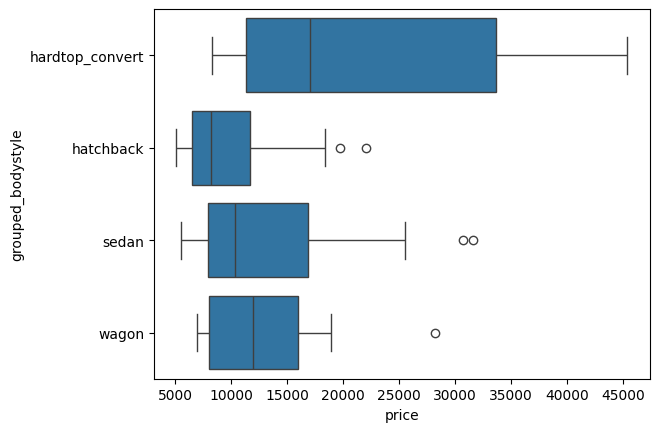

In [122]:
bodystyle_price_plot=sns.boxplot(x=df['price'],y=df['grouped_bodystyle'])

Usar `matplotlib.cbook.boxplot_stats` para mostrar la información del precio del las filas con valor '*sedan*' en la columna '*body_style*'.

#### Explicación del Código

1. **`df[df['body_style']=='sedan']`**:
   - Esta expresión filtra el DataFrame `df` para seleccionar solo las filas donde la columna `'body_style'` es igual a `'sedan'`. El resultado es un nuevo DataFrame llamado `sedan_data` que contiene únicamente los datos de los vehículos de tipo sedan.

2. **`boxplot_stats(sedan_data['price'])`**:
   - La función `boxplot_stats()` de la biblioteca `matplotlib.cbook` calcula estadísticas descriptivas para la columna `'price'` del DataFrame `sedan_data`. Estas estadísticas incluyen valores como la mediana, los cuartiles, y los límites de los bigotes, que son útiles para identificar valores atípicos en un boxplot. El resultado se almacena en la variable `stats_sedan`.

3. **`stats_sedan`**:
   - Esta línea simplemente muestra el contenido de la variable `stats_sedan`, que contiene las estadísticas calculadas para los precios de los vehículos de tipo sedan. Esto permite visualizar los resultados de las estadísticas descriptivas.

4. **`df.shape`**:
   - Este atributo devuelve una tupla que representa las dimensiones del DataFrame `df`, donde el primer elemento es el número de filas y el segundo elemento es el número de columnas. Se utiliza para verificar el tamaño del DataFrame original antes de realizar cualquier operación adicional.

### Resumen
El código filtra el DataFrame `df` para obtener solo los datos de los vehículos de tipo `'sedan'`, calcula las estadísticas descriptivas de los precios de estos vehículos utilizando `boxplot_stats()`, y finalmente muestra las dimensiones del DataFrame original.

In [49]:
sedan_data=df[df['body_style']=='sedan']
stats_sedan=boxplot_stats(sedan_data['price'])
stats_sedan
df.shape

(193, 27)

Usando el valor '`whishi`' recién calculado, eliminar las filas que tienen ese precio cuando en la columna '*body_style*' se encuentra el valor '*sedan*'.

#### Explicación del Código

1. **`stats_sedan[0]['whishi']`**:
   - Accede al primer elemento de la lista `stats_sedan` y obtiene el valor asociado a la clave `'whishi'`. Este valor representa el límite superior de los "bigotes" en un boxplot, que se utiliza para identificar valores atípicos en la columna de precios para el grupo de estilo de carrocería `'sedan'`.

2. **`DataFrame.drop(index)`**:
   - El método `drop()` se utiliza para eliminar filas o columnas de un DataFrame. En este caso, se está eliminando un subconjunto de filas del DataFrame `df`. El parámetro `index` especifica las filas que se deben eliminar, que son aquellas donde el estilo de carrocería es `'sedan'` y el precio es mayor o igual al valor de `whishi`.

3. **`df[(df['grouped_bodystyle']=='sedan') & (df['price']>=whishi)].index`**:
   - Esta expresión crea un filtro que selecciona las filas del DataFrame `df` donde la columna `'grouped_bodystyle'` es igual a `'sedan'` y la columna `'price'` es mayor o igual a `whishi`. El resultado es un objeto `Index` que contiene los índices de las filas que cumplen con estas condiciones.

4. **`df.shape`**:
   - Este atributo devuelve una tupla que representa las dimensiones del DataFrame `df`, donde el primer elemento es el número de filas y el segundo elemento es el número de columnas. Se utiliza para verificar el tamaño del DataFrame después de realizar la operación de eliminación.

### Resumen
El código obtiene el valor de `whishi` de las estadísticas de los precios para los vehículos de tipo `'sedan'`, elimina las filas del DataFrame `df` donde el precio es mayor o igual a `whishi` para esos vehículos, y finalmente muestra las dimensiones del DataFrame resultante.

In [57]:
whishi = stats_sedan[0]['whishi']
df = df.drop(df[(df['grouped_bodystyle']=='sedan')&(df['price']>=whishi)].index)
df.shape

(186, 27)

Comprobar el efecto volviendo a mostrar el diagrama de cajas del precio en función de la columna '*body_style*'.

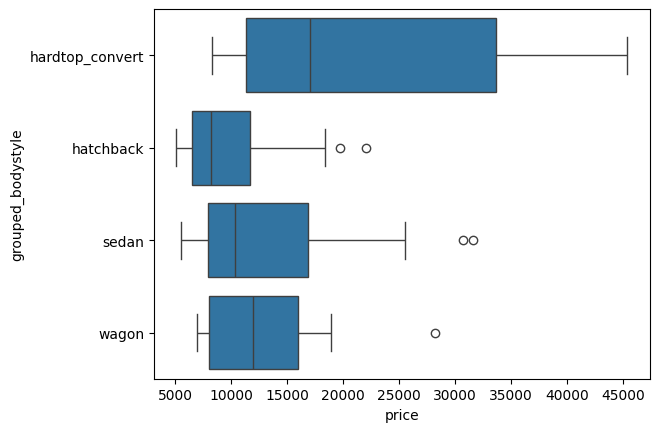

In [58]:
bodystyle_price_plot=sns.boxplot(x=df['price'],y=df['grouped_bodystyle'])

### Mostrar un mapa de calor de las columnas numéricas


#### Explicación de la Función

**`DataFrame.select_dtypes(include)`**:
- Selecciona columnas de un DataFrame basándose en su tipo de datos. El parámetro `include` permite especificar qué tipos de datos se deben incluir en la selección. Por ejemplo, `np.number` selecciona todas las columnas que son de tipo numérico (tanto enteros como flotantes). Esta función es útil para filtrar columnas y trabajar solo con aquellas que cumplen con ciertos criterios de tipo de datos.

In [106]:
numeric_columns= df.select_dtypes(np.number)
print(list(numeric_columns.columns))

['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


#### Explicación de Funciones

1. **`DataFrame.corr()`**:
   - Calcula la matriz de correlación entre las columnas numéricas de un DataFrame. La correlación mide la relación lineal entre dos variables, devolviendo un valor entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta, y 0 indica que no hay correlación.

2. **`DataFrame.abs()`**:
   - Devuelve un nuevo DataFrame con el valor absoluto de cada elemento. Es útil para eliminar el signo de los números, permitiendo trabajar solo con la magnitud de los valores.

3. **`plt.subplots(figsize=(width, height))`**:
   - Crea una figura y un conjunto de subgráficas (axes) en Matplotlib. El parámetro `figsize` especifica el tamaño de la figura en pulgadas, permitiendo personalizar el espacio de visualización para gráficos.

4. **`sns.heatmap(data, annot=False, fmt=None, ax=None)`**:
   - Crea un mapa de calor a partir de los datos proporcionados. Los parámetros permiten personalizar la visualización:
     - **`data`**: La matriz de datos que se va a visualizar.
     - **`annot`**: Si se debe mostrar el valor de cada celda en el mapa de calor.
     - **`fmt`**: Formato de los números que se mostrarán en las celdas.
     - **`ax`**: El objeto de ejes en el que se dibujará el mapa de calor.



<Axes: >

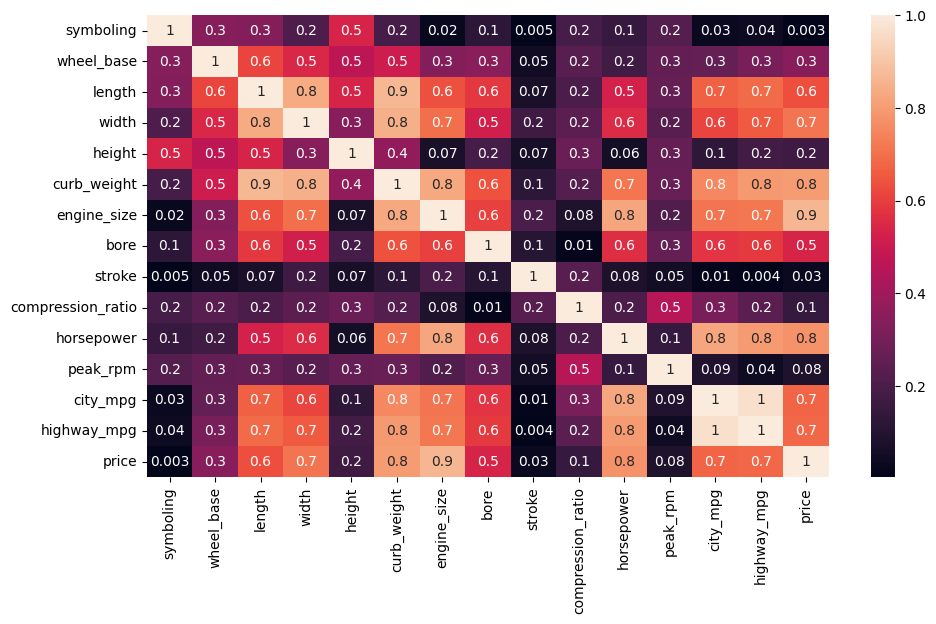

In [120]:
correlation_matrix=numeric_columns.corr().abs()
f, ax = plt.subplots(figsize=(11, 6))
sns.heatmap(correlation_matrix,annot=True,fmt='.1g',ax=ax)


### Guardar en un fichero *csv* el dataset preparado

#### Función `df.to_csv()` en pandas

La función `df.to_csv()` se utiliza para exportar un DataFrame de pandas a un archivo en formato CSV (Comma-Separated Values). Este formato es ampliamente utilizado para almacenar datos tabulares y es compatible con muchas aplicaciones, como hojas de cálculo y bases de datos.

##### Sintaxis

```python
DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', header=True, index=True, encoding=None, ...)
```

##### Parámetros Clave

- **`path_or_buf`**: Ruta del archivo donde se guardará el CSV.
- **`sep`**: Separador de los valores en el archivo (por defecto es `,`).
- **`na_rep`**: Representación de los valores nulos (por defecto es `''`).
- **`header`**: Si se debe incluir la fila de encabezado (por defecto es `True`).
- **`index`**: Si se debe incluir el índice del DataFrame (por defecto es `True`).
- **`encoding`**: Codificación del archivo (por ejemplo, `utf-8`).


In [121]:
df.to_csv('02.1.auto_prices_filtered.csv')